In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib
import koreanize_matplotlib

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [3]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [4]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [5]:
df['연령대코드(5세단위)'] = df['연령대코드(5세단위)'].replace(age_code)

In [6]:
df.groupby(['연령대코드(5세단위)'])['허리둘레'].describe()

,count,mean,std,min,25%,50%,75%,max
연령대코드(5세단위),,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='허리둘레'>

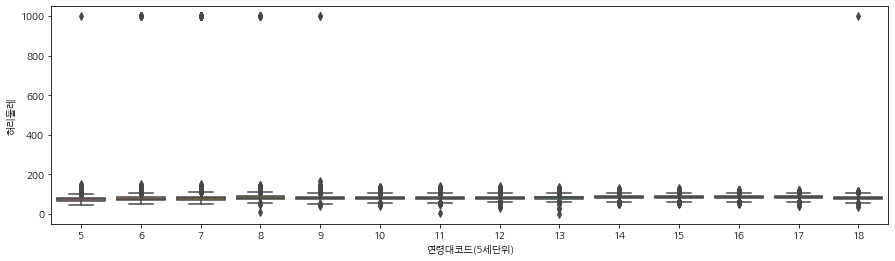

In [98]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="연령대코드(5세단위)", y="허리둘레")

In [99]:
Q1 = df['허리둘레'].quantile(q=0.25)
Q3 = df['허리둘레'].quantile(q=0.75)
IQR = Q3-Q1
IQR_df = df[(df['허리둘레'] <= Q3+1.5*IQR) & (df['허리둘레'] >= Q1-1.5*IQR)]

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='허리둘레'>

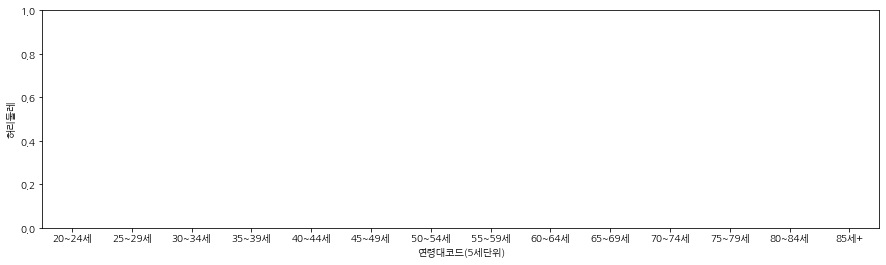

In [100]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=IQR_df, x="연령대코드(5세단위)", y="허리둘레", order=['20~24세','25~29세','30~34세','35~39세','40~44세',
                                                           '45~49세','50~54세','55~59세','60~64세','65~69세',
                                                           '70~74세','75~79세','80~84세','85세+'])

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [14]:
columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]
columns

['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']

In [15]:
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

In [16]:
df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.365642,-0.277149,-0.350001
흡연상태,0.365642,1.000000,-0.136350,-0.604199
연령대코드(5세단위),-0.277149,-0.136350,1.000000,0.076229
성별코드,-0.350001,-0.604199,0.076229,1.000000


/var/folders/qr/6jsz3w4516vdwmpnz67ktft00000gn/T/ipykernel_42357/2174653579.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


<AxesSubplot:>

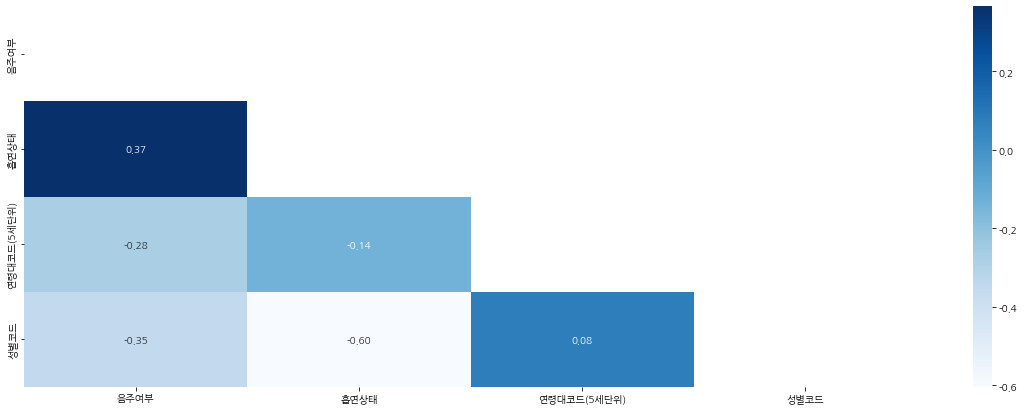

In [20]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask = mask)

In [24]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [57]:
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

In [58]:
df["흡연상태"]= df["흡연상태"].replace(smoke)

In [59]:
df["음주여부"]= df["음주여부"].replace(drink)

In [60]:
df3 = pd.crosstab(df["음주여부"], df["흡연상태"], dropna=False)

<AxesSubplot:xlabel='흡연상태', ylabel='count'>

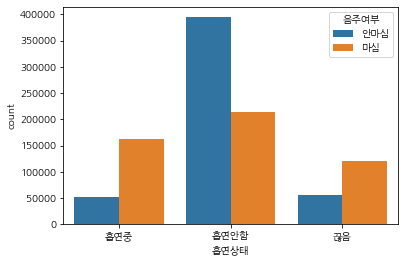

In [61]:
sns.countplot(x=df["흡연상태"], data=df3, hue=df["음주여부"])

In [74]:
df["체중(5Kg 단위)"] = df["체중(5Kg 단위)"].loc[df["체중(5Kg 단위))"] >= 120]

KeyError: '체중(5Kg 단위))'

<AxesSubplot:xlabel='총콜레스테롤', ylabel='감마지티피'>

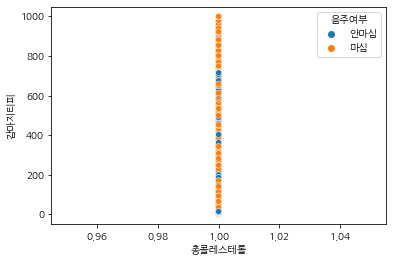

In [73]:
sns.scatterplot(data = df_corr, x = df["총콜레스테롤"], y = df["감마지티피"], hue=df['음주여부'])

In [79]:
df4 = df[["체중(5Kg 단위)", "총콜레스테롤", "감마지티피", "음주여부", "흡연상태"]]
df4

,체중(5Kg 단위),총콜레스테롤,감마지티피,음주여부,흡연상태
0,65.0,True,25.0,안마심,흡연중
1,45.0,True,10.0,안마심,흡연안함
2,75.0,True,136.0,안마심,흡연안함
3,55.0,True,30.0,마심,흡연안함
4,75.0,True,68.0,안마심,흡연중
...,...,...,...,...,...
999995,55.0,True,11.0,마심,흡연안함
999996,50.0,True,11.0,안마심,흡연안함
999997,50.0,True,12.0,안마심,흡연안함
999998,70.0,True,35.0,마심,끊음


In [91]:
df4 = df4.loc[df4["체중(5Kg 단위)"] >= 120]
df4

,체중(5Kg 단위),총콜레스테롤,감마지티피,음주여부,흡연상태
1219,120.0,True,47.0,안마심,흡연중
2309,155.0,NaN,19.0,안마심,흡연중
3497,120.0,True,111.0,마심,흡연중
3685,140.0,True,58.0,안마심,끊음
5788,140.0,True,35.0,안마심,흡연안함
...,...,...,...,...,...
996544,125.0,True,76.0,마심,흡연중
996828,120.0,True,82.0,마심,흡연중
997152,120.0,True,165.0,안마심,흡연안함
997414,135.0,True,62.0,안마심,흡연중


<AxesSubplot:xlabel='총콜레스테롤', ylabel='감마지티피'>

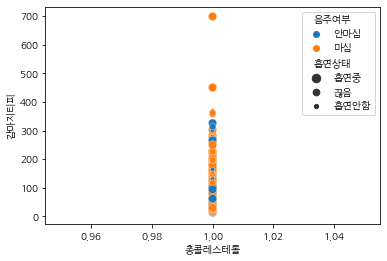

In [97]:
sns.scatterplot(data = df4, x = "총콜레스테롤", y = "감마지티피", hue='음주여부', size='흡연상태')

In [101]:
df4 = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")
df4["흡연상태"].replace(smoke, inplace=True)
df4["음주여부"].replace(drink, inplace=True)

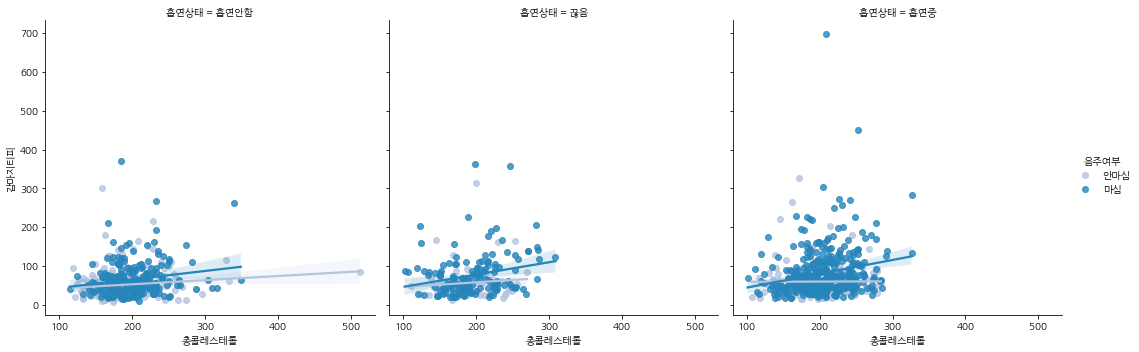

In [102]:
# "체중"이 120kg인 데이터만 추출합니다.
df41=df4[df4["체중(5Kg 단위)"] >= 120]
sns.lmplot(data=df41, x="총콜레스테롤", y="감마지티피", hue="음주여부", col="흡연상태", palette="PuBu",
           col_order=['흡연안함','끊음','흡연중'])

In [103]:
# Q5. 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!
df5 = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")
df5["연령대코드(5세단위)"].replace(age_code, inplace=True)
gender = {1: "남성", 2: "여성"}
df5["성별코드"].replace(gender, inplace=True)

In [104]:
df51=df5[df5["시력(좌)"] < 9.9]
df52=df51[df51["시력(우)"] < 9.9]

<AxesSubplot:xlabel='시력(좌)', ylabel='연령대코드(5세단위)'>

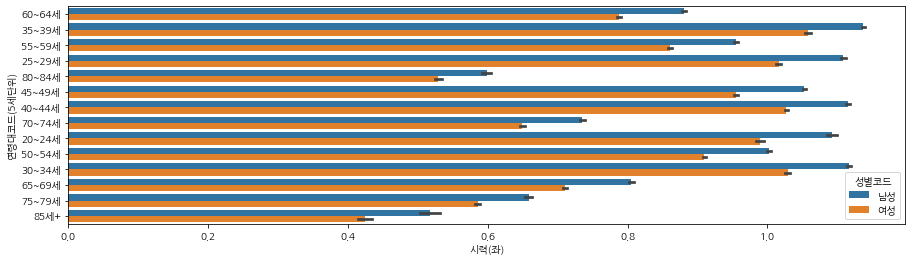

In [105]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df52, x="시력(좌)", y="연령대코드(5세단위)", hue="성별코드")

In [ ]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df52, x="시력(우)", y="연령대코드(5세단위)", hue="성별코드")

In [106]:
df52["시력(좌)_변환"]=df52["시력(좌)"]*(-1)
df53=pd.DataFrame(df52, columns=["성별코드", "연령대코드(5세단위)", "시력(우)", "시력(좌)_변환"])
df54=pd.melt(df53,id_vars=['성별코드','연령대코드(5세단위)'])
df54.head()

/var/folders/qr/6jsz3w4516vdwmpnz67ktft00000gn/T/ipykernel_42357/445803071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df52["시력(좌)_변환"]=df52["시력(좌)"]*(-1)


,성별코드,연령대코드(5세단위),variable,value
0,남성,60~64세,시력(우),1.2
1,여성,35~39세,시력(우),1.0
2,남성,35~39세,시력(우),0.8
3,여성,55~59세,시력(우),1.0
4,남성,35~39세,시력(우),1.5


<AxesSubplot:xlabel='value', ylabel='연령대코드(5세단위)'>

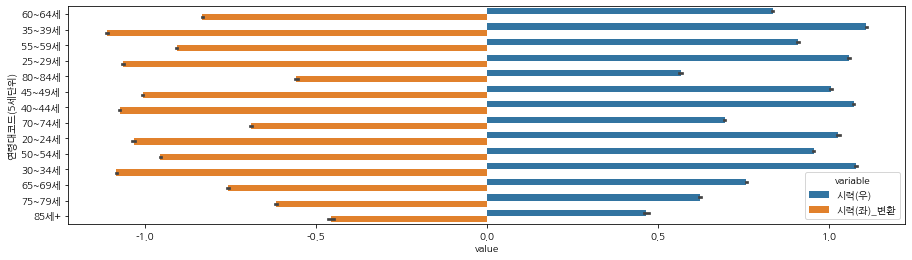

In [107]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df54, x="value", y="연령대코드(5세단위)", hue="variable")